# Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

import datetime as dt

from wordcloud import WordCloud, STOPWORDS

In [3]:
#create the dataframe
cwd=os.getcwd()
df=pd.read_csv(cwd+"/cleaned-BA-reviews.csv", index_col=0)

#let's also check the index are in order
df=df.reset_index(drop=True)

In [5]:
 df.head()

reviews  stars         country  \
0  Not Verified |  I flew internationally for the...      5   United States   
1  ✅ Trip Verified | BA, after subsequent delays ...      1           Italy   
2  Not Verified |   It is embarrassing to have th...      1       Australia   
3  ✅ Trip Verified | Flight cancelled due to bad ...      1  United Kingdom   
4  ✅ Trip Verified |  British Airways oversold my...     10   United States   

   verified                                             corpus       dates  
0     False  verified flew internationally first time life ...  2024-08-05  
1      True  ba subsequent delay postponed departure time i...  2024-08-03  
2     False  verified embarrassing word british attached ai...  2024-08-02  
3      True  flight cancelled due bad weather ba contacted ...  2024-08-02  
4      True  british airway oversold lhr lax flight booked ...  2024-07-30

What is the average overall rating given for British Airways?

In [7]:
df.stars.mean()

4.5859799713876965

What is the total counts for each ratings?

In [9]:
df.stars.value_counts()

stars
1     862
3     404
2     403
8     339
10    284
9     274
7     274
5     246
4     236
6     173
Name: count, dtype: int64

Text(0, 0.5, 'Total number of reviews with that rating')

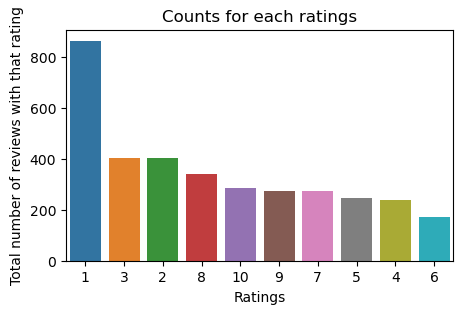

In [11]:
plt.figure(figsize=(5, 3))
sns.countplot(x=df.stars, order=df['stars'].value_counts().index)
plt.title("Counts for each ratings")
plt.xlabel("Ratings")
plt.ylabel("Total number of reviews with that rating")

In [82]:
#Unique countries BA received the reviews from

print(f'{len(df.country.unique())} unique countries')

70 unique countries


Which country most reviews comes from?

In [13]:
country_names=df.country.value_counts().index

In [15]:
country_val=df.country.value_counts().values

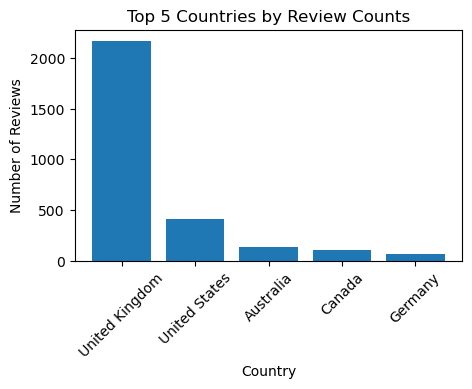

In [17]:
plt.figure(figsize=(5, 3))
plt.bar(country_names[:5], country_val[:5])
plt.xlabel('Country')
plt.ylabel('Number of Reviews')
plt.title('Top 5 Countries by Review Counts')
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.show()

([<matplotlib.patches.Wedge at 0x1ae248c5010>,
 [Text(-0.7750693273919559, 0.780555915829341, 'United Kingdom'),
  Text(0.46641197034656295, -0.9962228033514577, 'United States'),
  Text(0.9456900654102712, -0.5618454415444848, 'Australia'),
  Text(1.0622862839583984, -0.28556584339492896, 'Canada'),
  Text(1.0972646399644688, -0.0775261883729947, 'Germany')],
 [Text(-0.42276508766833953, 0.4257577722705496, '74.89%'),
  Text(0.2544065292799434, -0.5433942563735223, '14.16%'),
  Text(0.5158309447692387, -0.30646114993335527, '4.84%'),
  Text(0.5794288821591264, -0.15576318730632485, '3.87%'),
  Text(0.5985079854351647, -0.042287011839815286, '2.25%')])

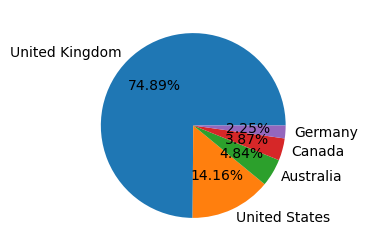

In [103]:
#using pie chart to show the percentage of reviews from top 5 countries out of the total

plt.figure(figsize=(5, 3))
plt.pie(country_val[:5],labels=country_names[:5],autopct='%1.2f%%')

Which country provided on average highest ratings?

In [19]:
df_country_ratings=df.groupby('country')['stars'].mean().sort_values(ascending=False).reset_index().rename(columns={'stars':'avg_rating'})

In [21]:
df_country_ratings.head()

country  avg_rating
0  Dominican Republic        10.0
1             Ecuador         9.0
2          Costa Rica         9.0
3               Japan         6.5
4            Bulgaria         6.5

Text(0.5, 1.0, 'Top 12 Countries with avg highest rating provided to British Airways')

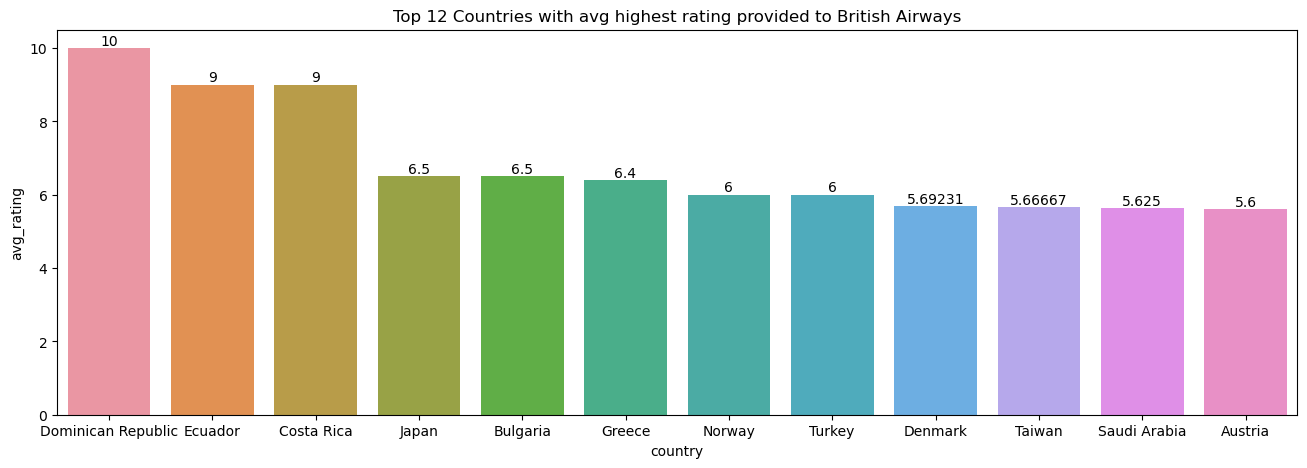

In [23]:
ax=plt.subplots(figsize=(16, 5))
ax=sns.barplot(data=df_country_ratings[:12], x='country', y='avg_rating')
ax.bar_label(ax.containers[0])
ax.set_title("Top 12 Countries with avg highest rating provided to British Airways")

### Time Series Analysis

In [25]:
#convert the date datatype to datetime

df.dates=pd.to_datetime(df.dates)

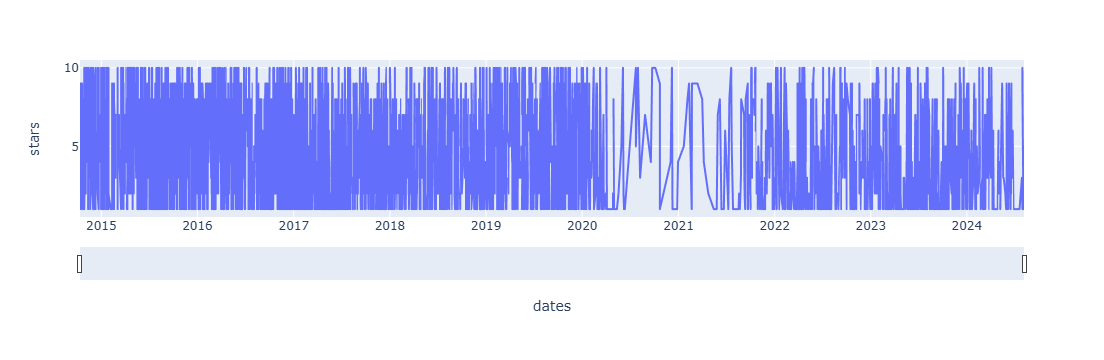

In [27]:
fig=px.line(df, x='dates', y='stars')
fig.update_xaxes(rangeslider_visible=True)
fig.show()

From March 2020 to October 2021, there was a decrease in reviews due to travel restrictions caused by the Covid pandemic. However, these review dates don’t always match the actual flight dates.

## Word Cloud

Word Cloud or Tag Clouds is a visualization technique for texts that are natively used for visualizing the tags or keywords from the websites.

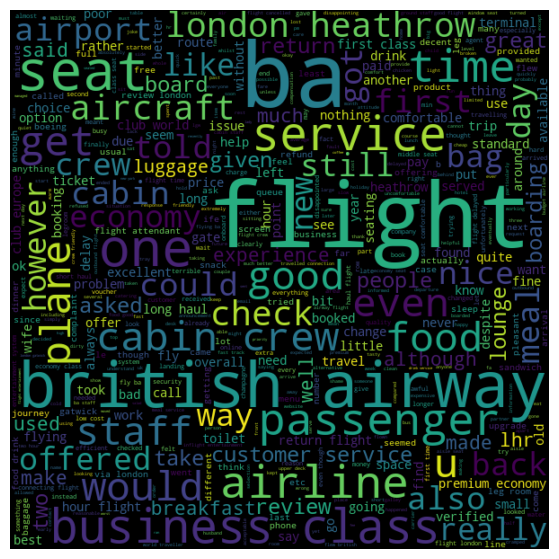

In [84]:
import nltk
from nltk.corpus import stopwords

#start with one review:
reviews=" ".join(df.corpus)

stopwords=set(stopwords.words('english'))

#Create and generate a word cloud image:
wordcloud=WordCloud(height=600,width=600,max_font_size=100,max_words=500,stopwords=stopwords).generate(reviews)

#Display the generated image:
plt.figure(figsize=(12,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

There are many words that does not set the idea of whether the review is positive or negative. For example words like "passenger", "plane", etc. does not add conlcusive value hence we can include them in stopwords list.

## Word Frequency

In [9]:
#text analysis
from nltk import ngrams
from nltk.probability import FreqDist

#text preprocessing
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import TfidfVectorizer

#split the text of all reviews into a list of words
words = reviews.split(" ")

#remove certain words that will not be used to determine the positive or negative sentiment
stopwords = text.ENGLISH_STOP_WORDS.union(['flight', 'ba', "passenger","u", "london","airway","british","airline",\
                                           "heathrow","plane","lhr","review"])


#filters those stopwords from list and create new list
new_words = [word for word in words if word not in stopwords]

##calculates frequency distribution of words and returns the 20 most common words along with their counts 
nlp_words=FreqDist(new_words).most_common(20)

#create a dataframe of these word and its frequencies
all_fdist = pd.Series(dict(nlp_words))

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'seat'),
  Text(1, 0, 'service'),
  Text(2, 0, 'time'),
  Text(3, 0, 'food'),
  Text(4, 0, 'crew'),
  Text(5, 0, 'cabin'),
  Text(6, 0, 'good'),
  Text(7, 0, 'class'),
  Text(8, 0, 'hour'),
  Text(9, 0, 'business'),
  Text(10, 0, 'staff'),
  Text(11, 0, 'economy'),
  Text(12, 0, 'check'),
  Text(13, 0, 'drink'),
  Text(14, 0, 'meal'),
  Text(15, 0, 'return'),
  Text(16, 0, 'lounge'),
  Text(17, 0, 'club'),
  Text(18, 0, 'customer'),
  Text(19, 0, 'boarding')])

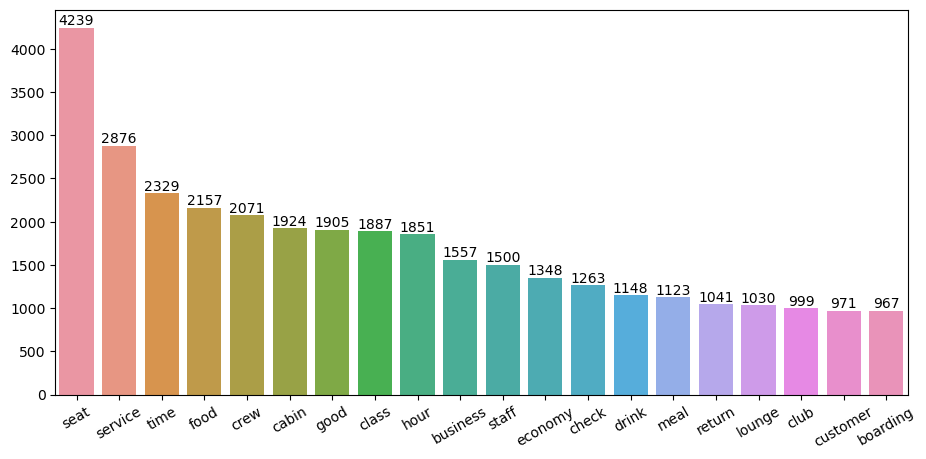

In [32]:
fig, ax = plt.subplots(figsize=(11,5))

all_plot = sns.barplot(x=all_fdist.index, y=all_fdist.values, ax=ax)
all_plot.bar_label(all_plot.containers[0])
plt.xticks(rotation=30)

This gives us a glimpse of what customers are really talking about here. We see that "Seat" is the most talked about the airline followed by "Service" and "Time" which are all very important to customers in terms of service. However, we still do not know they are expressing about each of this sevice. To bring some significance to these terms we will use ngram plots to see if they are bad or good in experience.

# Word Frequency with N-gram

<Axes: >

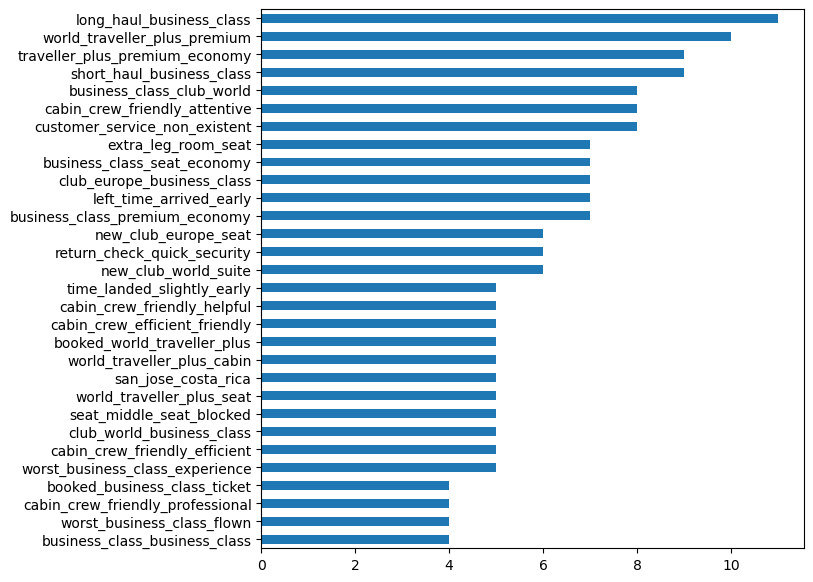

In [51]:
## Imports
import nltk.collocations as collocations
from nltk import FreqDist, bigrams

reviews = " ".join(df.corpus)

#split the text of all reviews into a list of words
words = reviews.split(" ")

new_words = [word for word in words if word not in stopwords]

def get_freq_dist(new_words,number_of_ngrams ):
    from nltk import ngrams
    
    ## Generate bigrams
    ngrams = ngrams(new_words, number_of_ngrams)

    ## Creating FreqDist
    ngram_fd = FreqDist(ngrams).most_common(30)

    ## Sort values by highest frequency
    ngram_sorted = {k:v for k,v in sorted(ngram_fd, key=lambda item:item[1])}

    ## Join bigram tokens with '_' + maintain sorting
    ngram_joined = {'_'.join(k):v for k,v in sorted(ngram_fd, key=lambda item:item[1])}

    ## Convert to Pandas series for easy plotting
    ngram_freqdist = pd.Series(ngram_joined)
    plt.figure(figsize=(7,7))
    ax = ngram_freqdist.plot(kind="barh")
    
    return ax


get_freq_dist(new_words,4)

We can see that there are very common positive terms regarding cabin crew. For example, cabin_crew_friendly_attentive, cabin_crew_friendly_helpful, cabin_crew_efficient_friendly, cabin_crew_friendly_professional,etc. So certainly customers are providing good reviews about cabin crew staff of British Airways 

We will try another method of labelling the reviews as positives or negatives or neutral. In this we will use VADER algorihtm by nltk library

## Sentiment Analysis using VADER

VADER stands for Valence Aware Dictionary and Sentiment Reasoner.

Vader sentiment not only tells if the statement is positve or negative along with the intensity of emotion.

In [63]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()


# function to calculate vader sentiment
def vadersentimentanalysis(review):
    vs = analyzer.polarity_scores(review)
    return vs['compound']

df['Sentiment'] = df['corpus'].apply(vadersentimentanalysis)

# function to analyse
def vader_analysis(compound):
    if compound >= 0.5:
        return 'Positive'
    elif compound < 0 :
        return 'Negative'
    else:
        return 'Neutral'
df['Analysis'] = df['Sentiment'].apply(vader_analysis)
df.head()

reviews  stars         country  \
0  Not Verified |  I flew internationally for the...      5   United States   
1  ✅ Trip Verified | BA, after subsequent delays ...      1           Italy   
2  Not Verified |   It is embarrassing to have th...      1       Australia   
3  ✅ Trip Verified | Flight cancelled due to bad ...      1  United Kingdom   
4  ✅ Trip Verified |  British Airways oversold my...     10   United States   

   verified                                             corpus       dates  \
0     False  verified flew internationally first time life ...  2024-08-05   
1      True  ba subsequent delay postponed departure time i...  2024-08-03   
2     False  verified embarrassing word british attached ai...  2024-08-02   
3      True  flight cancelled due bad weather ba contacted ...  2024-08-02   
4      True  british airway oversold lhr lax flight booked ...  2024-07-30   

   Sentiment  Analysis  
0    -0.9263  Negative  
1    -0.9732  Negative  
2     0.0000   Neutral  
3     0.4215   Neutral  
4    -0.9591  Negative

In [65]:
vader_counts = df['Analysis'].value_counts()
vader_counts

Analysis
Positive    1938
Negative    1181
Neutral      376
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x21e15f88e50>,
 [Text(-0.18744149616467495, 1.0839122130115282, 'Positive'),
  Text(-0.1825682236823173, -1.0847436764975786, 'Negative'),
  Text(1.273625756649507, -0.4476353784040876, 'Neutral')],
 [Text(-0.1022408160898227, 0.5912248434608335, '55.5%'),
  Text(-0.09958266746308214, -0.5916783689986792, '33.8%'),
  Text(0.8019125134459859, -0.2818444975136848, '10.8%')])

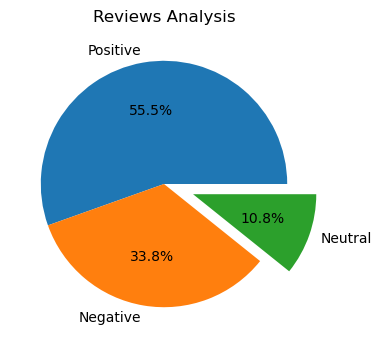

In [77]:
plt.figure(figsize=(5, 4))
plt.title("Reviews Analysis")
plt.pie(vader_counts.values, labels = vader_counts.index, explode = (0, 0, 0.25), autopct='%1.1f%%', shadow=False)